<a href="https://colab.research.google.com/github/Magicfenixx/AITraining/blob/main/Machine_Learning_Nikita_Ferents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
modeleasy= keras.models.Sequential()

In [ ]:
modeleasy.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [ ]:
modeleasy.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

In [ ]:
modeleasy.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
modeleasy.add(keras.layers.Dropout(0.25))

In [ ]:
modeleasy.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modeleasy.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modeleasy.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
modeleasy.add(keras.layers.Dropout(0.25))

In [ ]:
modeleasy.add(keras.layers.Flatten())

In [ ]:
modeleasy.add(keras.layers.Dense(512, activation='relu'))

In [ ]:
modeleasy.add(keras.layers.Dropout(0.5))

In [ ]:
modeleasy.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
modeleasy.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
modeleasy.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_of_model = modeleasy.fit(x_train, y_train_one_hot,
           batch_size=32, epochs=20,  #stavi max 15
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 16s 8ms/step - loss: 1.5157 - accuracy: 0.4473 - val_loss: 1.2005 - val_accuracy: 0.5672
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1019 - accuracy: 0.6083 - val_loss: 0.9044 - val_accuracy: 0.6824
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9348 - accuracy: 0.6688 - val_loss: 0.8301 - val_accuracy: 0.7136
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8440 - accuracy: 0.7007 - val_loss: 0.7802 - val_accuracy: 0.7266
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7745 - accuracy: 0.7276 - val_loss: 0.7467 - val_accuracy: 0.7460
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7161 - accuracy: 0.7486 - val_loss: 0.7333 - val_accuracy: 0.7419
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6694 - accuracy: 0.7633 - val_loss: 0.7305 - val_accuracy

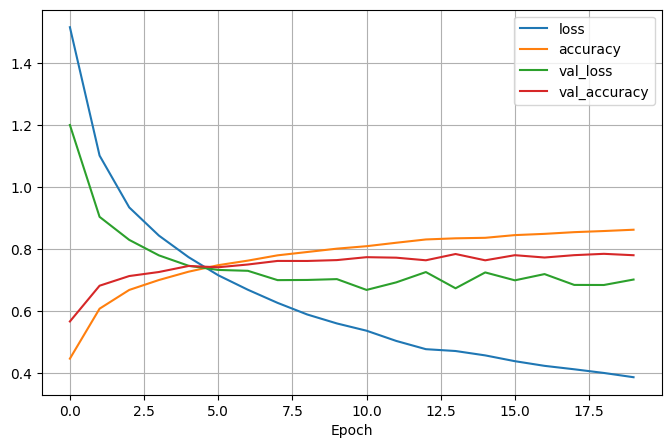

In [ ]:
import pandas as pd
pd.DataFrame(history_of_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epoch')
plt.show()

In [ ]:
modeleasy.save('my_easy_model.keras')

In [ ]:
modeleasy.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.7359 - accuracy: 0.7728


[0.7358548045158386, 0.7728000283241272]

In [ ]:
import numpy as np
probabilities = modeleasy.predict(np.array([x_test[150]]))

1/1 [==============================] - 0s 339ms/step


In [ ]:
probabilities

array([[1.34511858e-01, 2.85946161e-01, 3.28585762e-03, 3.06951057e-04,
        1.37165573e-03, 1.95486061e-02, 3.99257243e-02, 1.46253149e-06,
        4.00523573e-01, 1.14578165e-01]], dtype=float32)

In [ ]:
class_names = ['airplane', 'car', 'bird', 'cat', 'dear', 'dog', 'frog',
               'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])

In [ ]:
for i in range (9,5,-1):  #prvih nekoliko probabilities
  print(class_names[index[i]], ":", probabilities[0,index[i]])

ship : 0.40052357
car : 0.28594616
airplane : 0.13451186
truck : 0.114578165


MODEL DOUBLE Very Deep Convolutional Networks for Large-Scale Image Recognition(VGG-16)

In [ ]:
modeldouble= keras.models.Sequential()
modeldouble.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
modeldouble.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
modeldouble.add(keras.layers.Dropout(0.25))
modeldouble.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
modeldouble.add(keras.layers.Dropout(0.25))
modeldouble.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
modeldouble.add(keras.layers.Dropout(0.25))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
modeldouble.add(keras.layers.Dropout(0.25))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modeldouble.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
modeldouble.add(keras.layers.Dropout(0.25))
modeldouble.add(keras.layers.Flatten())
modeldouble.add(keras.layers.Dense(4096, activation='relu'))
modeldouble.add(keras.layers.Dense(4096, activation='relu'))
modeldouble.add(keras.layers.Dense(4096, activation='relu'))
modeldouble.add(keras.layers.Dropout(0.5))
modeldouble.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
modeldouble.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [ ]:
modeldouble.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_of_model = modeldouble.fit(x_train, y_train_one_hot,
           batch_size=32, epochs=20,  #stavi max 15
           validation_split=0.2)


Epoch 1/20
1250/1250 [==============================] - 59s 41ms/step - loss: 2.3033 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 2/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 3/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 4/20
1250/1250 [==============================] - 51s 40ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 5/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 7/20
1250/1250 [==============================] - 50s 40ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 -

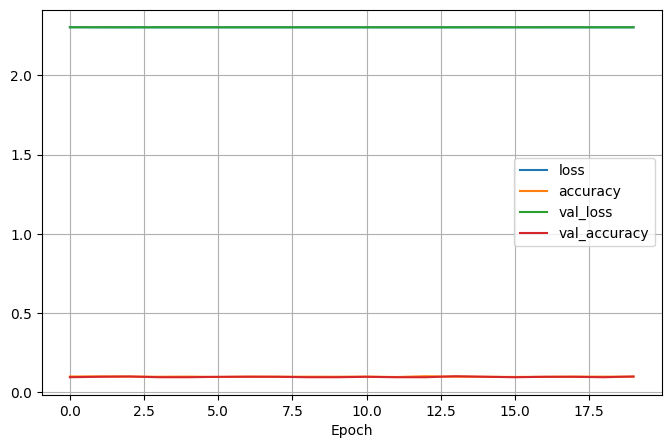

In [ ]:
import pandas as pd
pd.DataFrame(history_of_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('Epoch')
plt.show()

In [ ]:
modeldouble.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 3s 10ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026294708251953, 0.10000000149011612]

In [ ]:
modeldouble.save('my_double_model.keras')

In [ ]:
import numpy as np
probabilities = modeldouble.predict(np.array([x_test[150]]))

1/1 [==============================] - 1s 684ms/step


In [ ]:
for i in range (9,5,-1):  #prvih nekoliko probabilities
  print(class_names[index[i]], ":", probabilities[0,index[i]])

ship : 0.09989106
car : 0.10012464
airplane : 0.09915538
truck : 0.09984085


In [ ]:
keras.backend.clear_session()

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="cifar10", epochs=5, imgsz=32)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

100%|██████████| 5.30M/5.30M [00:00<00:00, 232MB/s]


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=cifar10, epochs=5, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 140M/140M [00:00<00:00, 171MB/s]
Unzipping /content/datasets/cifar10.zip to /content/datasets/cifar10...: 100%|██████████| 60023/60023 [00:10<00:00, 5842.76file/s]


Dataset download success ✅ (12.5s), saved to /content/datasets/cifar10

train: /content/datasets/cifar10/train... found 50000 images in 10 classes ✅ 
val: None...
test: /content/datasets/cifar10/test... found 10000 images in 10 classes ✅ 
Overriding model.yaml nc=1000 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     7398

train: Scanning /content/datasets/cifar10/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:08<00:00, 5762.68it/s]


train: New cache created: /content/datasets/cifar10/train.cache


val: Scanning /content/datasets/cifar10/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 6110.05it/s]


val: New cache created: /content/datasets/cifar10/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G      2.725         16         32:   0%|          | 3/3125 [00:00<09:48,  5.30it/s]

        1/5         0G       2.68         16         32:   0%|          | 7/3125 [00:01<06:36,  7.87it/s]
100%|██████████| 755k/755k [00:00<00:00, 66.6MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.91it/s]

                   all      0.553      0.946



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.39it/s]

                   all      0.647      0.965



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 22.75it/s]

                   all      0.682      0.972



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.01it/s]

                   all      0.711      0.977



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.93it/s]

                   all      0.723      0.979



5 epochs completed in 0.461 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/cifar10/train... found 50000 images in 10 classes ✅ 
val: None...
test: /content/datasets/cifar10/test... found 10000 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 24.05it/s]


                   all      0.723      0.979
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
result = model(x_test[150])

NameError: name 'model' is not defined

In [ ]:
result = model(x_test)


0: 32x32 dog 0.15, cat 0.14, horse 0.12, ship 0.10, deer 0.10, 24.1ms
Speed: 494.5ms preprocess, 24.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


In [ ]:
y_test[160]

array([2], dtype=uint8)

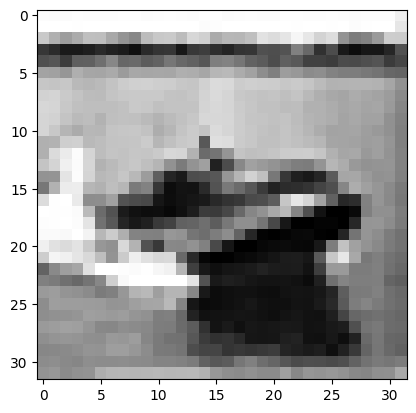

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[150])

In [ ]:
model.save('my_cifar10_model.h5')

In [ ]:
model.eval()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=cifar10, epochs=5, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

train: Scanning /content/datasets/cifar10/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:00<?, ?it/s]
val: Scanning /content/datasets/cifar10/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.12it/s]

                   all      0.627      0.963



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:14<00:00, 21.25it/s]

                   all      0.675      0.973



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 22.91it/s]


                   all      0.701      0.976

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:14<00:00, 22.23it/s]

                   all      0.721      0.977



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 23.03it/s]

                   all      0.736      0.983



5 epochs completed in 0.478 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/cifar10/train... found 50000 images in 10 classes ✅ 
val: None...
test: /content/datasets/cifar10/test... found 10000 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:13<00:00, 22.97it/s]


                   all      0.736      0.983
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e78879ff9d0>
curves: []
curves_results: []
fitness: 0.8594000041484833
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.736299991607666, 'metrics/accuracy_top5': 0.9825000166893005, 'fitness': 0.8594000041484833}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.0007508039474487304, 'inference': 0.6635741472244262, 'loss': 0.00010340213775634765, 'postprocess': 8.27789306640625e-05}
task: 'classify'
top1: 0.736299991607666
top5: 0.9825000166893005

In [ ]:
results = model.train(data="imagenet10", epochs=100, imgsz=32)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=imagenet10, epochs=100, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/datasets/imagenet10/train... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
val: Scanning /content/datasets/imagenet10/val... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train222
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G      4.475         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G        4.4         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G      4.641         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.92it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G      4.836         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.09it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G      4.455         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.33it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G      3.597         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.04it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G      4.032         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.21it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G      3.908         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.76it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G      4.585         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.15it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G      3.897         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.47it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G      2.753         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.48it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G      3.484         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.38it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G      3.494         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.81it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G      3.561         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.68it/s]

                   all     0.0833      0.333



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G      3.035         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.27it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G      2.979         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.21it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G      2.165         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.53it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G      3.255         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.83it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G      2.361         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.31it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G      2.232         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.66it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G       1.81         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.89it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G      1.431         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.43it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G      2.383         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.75it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G      1.821         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.77it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G      2.115         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.87it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G      1.684         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.07it/s]

                   all     0.0833      0.417



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G       1.52         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.55it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G      1.341         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.34it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G      2.297         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.02it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G      1.744         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.90it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G     0.7141         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G      1.278         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G     0.9735         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.60it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G      1.174         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.29it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G      1.107         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.31it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G      1.032         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.94it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G      1.464         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.86it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G     0.8282         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G      1.101         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G      1.278         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.79it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G     0.9357         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.92it/s]

                   all     0.0833       0.75



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G      1.393         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.93it/s]

                   all     0.0833       0.75



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G     0.6207         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.09it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G     0.4528         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.17it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G     0.5804         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.90it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G     0.6738         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.52it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G     0.6375         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.00it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G     0.3818         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.38it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G     0.7464         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.21it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G     0.3928         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.18it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G     0.3952         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.26it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G     0.4828         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.28it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G      0.471         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.80it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G     0.5281         12         32: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G     0.2718         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G     0.7024         12         32: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G      0.488         12         32: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G     0.2824         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G     0.3218         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.35it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G      0.223         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.47it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G     0.4479         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.33it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G     0.2404         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.03it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G     0.7987         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.94it/s]

                   all     0.0833      0.833



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G     0.4191         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.11it/s]

                   all     0.0833      0.833



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G     0.5804         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.65it/s]

                   all     0.0833      0.833



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G      0.562         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.10it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G     0.3931         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.71it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G     0.4898         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.82it/s]

                   all          0      0.833



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G     0.3129         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.22it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G     0.1927         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.03it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G     0.3862         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.31it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G     0.2379         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G     0.1994         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G     0.4236         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.39it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G     0.3599         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.80it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G     0.2026         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.94it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G     0.1785         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.42it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G     0.7921         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.40it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G     0.1735         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.45it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G     0.4053         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.21it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G     0.2951         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.95it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G     0.4227         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.84it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G     0.1891         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.83it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G     0.1218         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.30it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G     0.3267         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.14it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G     0.1128         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.33it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G     0.1673         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.02it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G     0.1593         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.22it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G     0.3996         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.28it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G     0.1192         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.42it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G     0.4217         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.16it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G     0.1732         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G     0.3344         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G      0.336         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.11it/s]


                   all     0.0833      0.583

      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G     0.1926         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.71it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G      0.196         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.31it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G     0.3483         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.69it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G     0.1936         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.10it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G     0.2734         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.13it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G     0.4642         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.00it/s]

                   all     0.0833      0.583



100 epochs completed in 0.022 hours.
Optimizer stripped from runs/classify/train222/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train222/weights/best.pt, 3.0MB

Validating runs/classify/train222/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/imagenet10/train... found 12 images in 10 classes ✅ 
val: /content/datasets/imagenet10/val... found 12 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.66it/s]


                   all     0.0833      0.833
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train222
Results saved to runs/classify/train222


In [ ]:
model.eval()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=imagenet10, epochs=100, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train2222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/datasets/imagenet10/train... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
val: Scanning /content/datasets/imagenet10/val... 12 images, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train2222
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G     0.1668         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.01it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G     0.3911         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G     0.4881         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all          0      0.583



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G     0.3204         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G      0.264         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.82it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G     0.2172         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.36it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G     0.6293         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.98it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G     0.2429         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.23it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G     0.3915         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.98it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G     0.3536         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.20it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G     0.1825         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.70it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G     0.1873         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.79it/s]

                   all          0      0.667



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G     0.4331         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.77it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G     0.1585         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.31it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G     0.5027         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.54it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G      0.165         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.31it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G     0.5718         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.87it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G     0.3688         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.77it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G     0.2097         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.72it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G     0.2332         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.28it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G      0.294         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.04it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G      0.248         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.91it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G     0.1741         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.84it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G     0.2608         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.53it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G     0.1888         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.85it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G     0.2697         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.50it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G     0.1399         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.23it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G     0.1156         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.47it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G     0.3001         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.98it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G     0.2165         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.52it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G     0.0625         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.20it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G    0.09336         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.47it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G    0.08086         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.79it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G    0.08434         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.51it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G    0.07201         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.76it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G    0.09448         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.39it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G     0.2081         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.34it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G    0.06744         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.40it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G    0.05073         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.04it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G      0.269         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.55it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G    0.05287         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.09it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G     0.2124         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.55it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G    0.06422         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.54it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G    0.03936         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.93it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G    0.04303         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.72it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G    0.05579         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.03it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G     0.2046         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.66it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G    0.06126         12         32: 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.76it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G     0.1355         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G    0.06391         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.18it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G    0.03852         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.32it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G     0.0586         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.27it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G    0.03679         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.84it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G    0.08094         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.61it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G    0.03894         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.54it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G     0.1113         12         32: 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.30it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G     0.1027         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.00it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G    0.04279         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.89it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G    0.03719         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.05it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G    0.03516         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G     0.2117         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.47it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G    0.03012         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.35it/s]

                   all     0.0833      0.667



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G     0.2318         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.75it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G     0.3309         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.21it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G     0.1931         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.94it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G     0.3617         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.88it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G    0.07782         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.84it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G     0.3418         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.19it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G    0.05655         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.39it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G    0.02966         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.30it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G    0.06747         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G    0.03838         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.71it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G    0.03597         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.99it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G     0.1278         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.42it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G    0.09699         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.01it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G    0.03027         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.04it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G    0.02827         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.57it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G     0.4082         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G    0.02642         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G     0.1186         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.77it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G    0.06362         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.99it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G     0.1672         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.60it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G    0.02732         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.35it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G    0.02252         12         32: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.05it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G    0.06907         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.38it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G    0.01824         12         32: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.58it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G    0.02492         12         32: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.65it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G    0.02686         12         32: 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.82it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G     0.1415         12         32: 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.76it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G    0.01658         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.63it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G     0.1562         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.16it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G    0.03835         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.04it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G     0.1404         12         32: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.56it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G     0.1078         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.10it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G    0.03202         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.33it/s]

                   all     0.0833      0.583



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G    0.06667         12         32: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G    0.04236         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.67it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G    0.04097         12         32: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.94it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G     0.1236         12         32: 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.45it/s]

                   all     0.0833        0.5



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G     0.1283         12         32: 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.14it/s]

                   all     0.0833      0.583



100 epochs completed in 0.021 hours.
Optimizer stripped from runs/classify/train2222/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2222/weights/best.pt, 3.0MB

Validating runs/classify/train2222/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/imagenet10/train... found 12 images in 10 classes ✅ 
val: /content/datasets/imagenet10/val... found 12 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.10it/s]


                   all     0.0833      0.667
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2222
Results saved to runs/classify/train2222


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e78980696f0>
curves: []
curves_results: []
fitness: 0.3750000111758709
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.0833333358168602, 'metrics/accuracy_top5': 0.6666666865348816, 'fitness': 0.3750000111758709}
save_dir: PosixPath('runs/classify/train2222')
speed: {'preprocess': 0.0017285346984863281, 'inference': 0.9193221728006998, 'loss': 0.0003178914388020833, 'postprocess': 0.00033775965372721356}
task: 'classify'
top1: 0.0833333358168602
top5: 0.6666666865348816

In [ ]:
model.save('my_imagenet10_model.h5')